# I have tried to simplify the Logistic Regression model as much as possible

### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Prepearing the data

In [2]:
# Geting the data
df = pd.read_csv('marks.csv')
df = df[['x1','x2','y']]

# Separating target variable (y) and features(x1,x2)
y = df['y']
features_df = df[['x1','x2']]

# Add a column with ones from left on features
features_df.insert(loc=0, column='x0', value=np.ones(len(features_df)))

# print the data we are working with (features only)
features_df.head()

,x0,x1,x2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


### Feature scaling - Mean normalization

<img src='https://cdn-images-1.medium.com/max/2400/1*fyK4gMQrfJKV5pmbXSrNbg.png'>

In [3]:
features_df['x1'] = (features_df['x1'] - np.mean(features_df['x1'])) / (np.max(features_df['x1']-np.min(features_df['x1'])))
features_df['x2'] = (features_df['x2'] - np.mean(features_df['x2'])) / (np.max(features_df['x2']-np.min(features_df['x2'])))

features_df.head()


,x0,x1,x2
0,1.0,-0.444619,0.172892
1,1.0,-0.506780,-0.327058
2,1.0,-0.427079,0.097855
3,1.0,-0.078282,0.294239
4,1.0,0.191897,0.133630


### Defining some variables that will be used in model

In [4]:
# Define the learning rate
alpha = 0.0001

# Define The number of iterations
n_iter = 10000

# Rows size
rows_size = features_df.shape[0]

# Columns size
columns_size = features_df.shape[1]

### Creating initial thetas

In [5]:
np.random.seed(2)
thetas = [0.001,0.002,0.003]


### Predict with initial thetas using Sigmoid function

<img src='https://cdn-images-1.medium.com/max/720/1*l59BUnPwWHMf1H-GNxgZHQ.png'>

In [6]:
thetaTX = np.dot(features_df, thetas)
predicted = 1/(1+np.exp(-thetaTX))
predicted[:10]

array([0.50015736, 0.49975132, 0.50010985, 0.50043154, 0.50044617,
       0.49999382, 0.50055025, 0.50010114, 0.50055782, 0.50013538])

### Calculate Loss function with initial thetas

<img src='https://cdn-images-1.medium.com/max/720/1*_52kKSp8zWgVTNtnE2eYrg.png'>

In [7]:
loss = -1/rows_size * sum(y*np.log(predicted) + (1-y) * np.log(1-predicted))
print(loss)

# Create an empty array that will be filled with losses
Losses =[]

# Append the first loss
Losses.append(loss)

0.6926874075733704


### Change thetas with gradient decent

<img src='https://cdn-images-1.medium.com/max/720/1*Ecea3jVIRxK4Mkrh_Nie4w.jpeg'>

In [8]:
for i in np.arange(n_iter):
    thetas[0] = thetas[0] - alpha*sum((predicted-y)*features_df['x0'])
    thetas[1] = thetas[1] - alpha*sum((predicted-y)*features_df['x1'])
    thetas[2] = thetas[2] - alpha*sum((predicted-y)*features_df['x2'])

    # Predict with changed thetas
    thetaTX = np.dot(features_df, thetas)
    predicted = 1/(1+np.exp(-thetaTX))
    predicted

#   Fill Losses array
    loss = -1/rows_size * sum(y*np.log(predicted) + (1-y) * np.log(1-predicted))
    Losses.append(loss)

### Plot the Losses

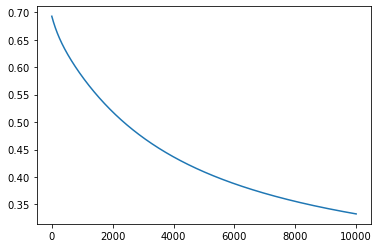

In [9]:
plt.plot(Losses)

### Great!!! Now lets see the last predictions with minimum loss

In [10]:
predicted[:10]

array([0.35407417, 0.06352892, 0.30888037, 0.79189118, 0.86373981,
       0.23891211, 0.8742699 , 0.51592881, 0.9109426 , 0.61072297])

###  Round the predictions in order to see only ones and zeros


In [11]:
pred_round=np.round(predicted)
pred_round


array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

### Now let's compare the predictions with actual values

In [12]:
res = pd.DataFrame(columns=['percent','predicted','actual'])

res['percent'] = predicted
res['predicted'] = pred_round
res['actual'] = y

### Calculate the accuracy

In [13]:
np.sum(res['predicted'] == res['actual'])

91